<a href="https://colab.research.google.com/github/LeoDinga/DL_Project/blob/main/Project_DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import shutil
# import os

# Lista todas as pastas/ficheiros na raiz
# for item in os.listdir('/content'):
#     item_path = os.path.join('/content', item)

#     # Apenas apaga se for uma pasta e não for 'sample_data'
#     if os.path.isdir(item_path) and item != 'sample_data':
#         shutil.rmtree(item_path)
#         print(f"Removido: {item_path}")



# !ls /content


In [1]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu



Found existing installation: torch 2.7.0+cpu
Uninstalling torch-2.7.0+cpu:
  Successfully uninstalled torch-2.7.0+cpu
Found existing installation: torchvision 0.22.0+cpu
Uninstalling torchvision-0.22.0+cpu:
  Successfully uninstalled torchvision-0.22.0+cpu
Found existing installation: torchaudio 2.7.0+cpu
Uninstalling torchaudio-2.7.0+cpu:
  Successfully uninstalled torchaudio-2.7.0+cpu
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.22.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.6 kB)
Using cached https://download.pytorch.org/whl/cpu/torch-2.7.0%2Bcpu-cp311-cp311-manylinux_2_28_x86_64.whl (176.0 MB)
Using cached https://download.pytorch.org/whl/c

In [1]:
# import os
# os.kill(os.getpid(), 9)

import torch
import torchvision
import torchvision.transforms as T
import torchvision.models as models

import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

In [2]:
!pip install -U openmim

In [3]:
# 3. Instala mmcv e mmengine (usa as versões mais recentes, que já suportam Python 3.11)
!mim install "mmcv>=2.0.0"
!mim install "mmengine>=0.9.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.7.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.7.0/index.html


In [1]:
# Suas instalações existentes para mediapipe e protobuf (mantenha-as se foram necessárias para resolver problemas anteriores)
# !pip uninstall -y mediapipe-silicon
# !pip uninstall -y mediapipe
# !pip uninstall -y protobuf
# !pip install protobuf==3.20.3
# !pip install mediapipe

# 4. Instala MediaPipe e Protobuf compatível
!pip install protobuf==3.20.3
!pip install mediapipe

Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
Found existing installation: protobuf 4.25.7
Uninstalling protobuf-4.25.7:
  Successfully uninstalled protobuf-4.25.7
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
yfinance 0.2.61 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
grpcio-status 1.71

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
yfinance 0.2.61 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6

In [4]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score
import shutil
import random
import mediapipe as mp

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [5]:
!git clone --filter=blob:none --no-checkout https://github.com/THETIS-dataset/dataset.git
%cd dataset
!git sparse-checkout init --cone
!git sparse-checkout set VIDEO_RGB
!git checkout

fatal: destination path 'dataset' already exists and is not an empty directory.
/content/dataset
Your branch is up to date with 'origin/main'.


In [6]:
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: False
Device name: No GPU


In [8]:
import os
print(os.listdir('VIDEO_RGB'))

['backhand_slice', 'forehand_volley', 'backhand_volley', 'kick_service', 'slice_service', 'smash', 'backhand', 'flat_service', 'forehand_openstands', 'forehand_flat', 'backhand2hands', 'forehand_slice']


In [9]:
#shows the videos in each folder
data_path = 'VIDEO_RGB'

# Print out the directory structure
for root, dirs, files in os.walk(data_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Root: VIDEO_RGB
Dirs: ['backhand_slice', 'forehand_volley', 'backhand_volley', 'kick_service', 'slice_service', 'smash', 'backhand', 'flat_service', 'forehand_openstands', 'forehand_flat', 'backhand2hands', 'forehand_slice']
Files: []
----------------------------------------
Root: VIDEO_RGB/backhand_slice
Dirs: []
Files: ['p32_bslice_s1.avi', 'p28_bslice_s1.avi', 'p39_bslice_s3.avi', 'p25_bslice_s2.avi', 'p25_bslice_s3.avi', 'p54_bslice_s2.avi', 'p40_bslice_s1.avi', 'p24_bslice_s1.avi', 'p26_bslice_s3.avi', 'p19_bslice_s3.avi', 'p52_bslice_s2.avi', 'p32_bslice_s3.avi', 'p9_bslice_s3.avi', 'p36_bslice_s3.avi', 'p38_bslice_s2.avi', 'p12_bslice_s2.avi', 'p46_bslice_s3.avi', 'p13_bslice_s2.avi', 'p24_bslice_s2.avi', 'p26_bslice_s1.avi', 'p36_bslice_s2.avi', 'p28_bslice_s2.avi', 'p43_bslice_s3.avi', 'p22_bslice_s1.avi', 'p52_bslice_s1.avi', 'p1_bslice_s3.avi', 'p54_bslice_s1.avi', 'p18_bslice_s2.avi', 'p29_bslice_s2.avi', 'p30_bslice_s3.avi', 'p1_bslice_s1.avi', 'p20_bslice_s3.avi', 'p38_bs

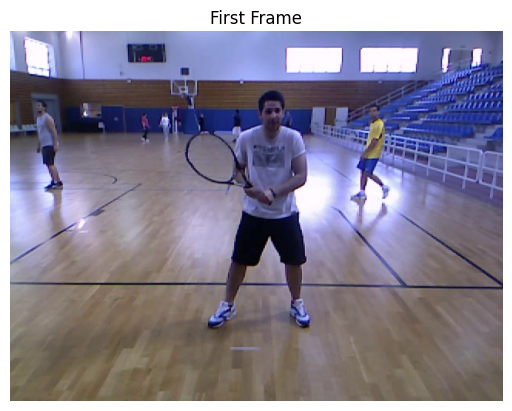

In [10]:
# just for us to see the first frame of the video
video_path = "/content/dataset/VIDEO_RGB/backhand/p10_backhand_s1.avi"

import cv2
cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
if not ret:
    print("Failed to read frame")
else:
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()

cap.release()

In [11]:
#it's taking 5 min
def convert_video_to_npy(video_path, resize_shape=(224, 224)):
    """
    Converts a video to a numpy array of resized frames.

    Parameters:
    - video_path: The path to the video file.
    - resize_shape: The desired frame size (default is 224x224).

    Returns:
    - frames_array: Numpy array containing all frames.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []

    if not cap.isOpened():
        raise ValueError(f"Error opening video file: {video_path}")

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Resize frame to the desired shape
        frame_resized = cv2.resize(frame, resize_shape)
        frames.append(frame_resized)

    cap.release()

    # Convert list of frames into a numpy array
    frames_array = np.array(frames)
    return frames_array

def create_subfolders(pastas_dir, output_dir):
    """
    Creates subfolders in the output directory and processes .avi files.

    Parameters:
    - pastas_dir: The root directory containing class folders.
    - output_dir: The directory where the .npy files will be saved.
    """
    for pastas_filename in os.listdir(pastas_dir):
        origem_path = os.path.join(pastas_dir, pastas_filename)

        # Check if it's a directory (ignore files)
        if os.path.isdir(origem_path):
            nova_pasta_path = os.path.join(output_dir, pastas_filename)
            os.makedirs(nova_pasta_path, exist_ok=True)

            # Process each video file in the subfolder
            videos_dir = os.path.join(pastas_dir, pastas_filename)
            for video_filename in os.listdir(videos_dir):
                if video_filename.endswith(".avi"):  # Process only .avi files
                    video_path = os.path.join(videos_dir, video_filename)
                    video_name = os.path.splitext(video_filename)[0]

                    try:
                        # Convert the video to numpy array
                        frames_array = convert_video_to_npy(video_path)

                        # Save the numpy array to a .npy file
                        output_filename = os.path.join(nova_pasta_path, f"{video_name}.npy")
                        np.save(output_filename, frames_array)
                    except ValueError as e:
                        print(f"Error processing {video_filename}: {e}")
                    except Exception as e:
                        print(f"Unexpected error with {video_filename}: {e}")

# Example usage
pastas_dir = 'VIDEO_RGB'  # Directory with .avi videos
npy_dir = 'npy_videos'  # Directory to save .npy files
os.makedirs(npy_dir, exist_ok=True)

# Process videos and maintain class folders
create_subfolders(pastas_dir, npy_dir)

In [12]:
# Corrected function
def pad_or_truncate_keypoints(keypoints, target_length):
    num_frames = keypoints.shape[0]
    if num_frames < target_length:
        padding = np.zeros((target_length - num_frames, keypoints.shape[1], keypoints.shape[2]))
        padded_keypoints = np.concatenate((keypoints, padding), axis=0)
        return padded_keypoints
    elif num_frames > target_length:
        truncated_keypoints = keypoints[:target_length]
        return truncated_keypoints
    else:
        return keypoints

In [15]:
video_keypoints = []
# Change this to your actual .npy file path
video_path = "/content/dataset/npy_videos/backhand/p10_backhand_s1.npy"

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# Load the video as array of frames
sample = np.load(video_path)

# Check dimensions and dtype
if sample.ndim != 4 or sample.shape[-1] != 3:
    raise ValueError(f"Invalid input shape: {sample.shape}")
if sample.dtype != np.uint8:
    sample = sample.astype(np.uint8)

# Process each frame
for frame in sample:
    if frame is None or frame.shape != (224, 224, 3):
        continue

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        keypoints = [[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]
    else:
        keypoints = np.zeros((33, 3)).tolist()

    video_keypoints.append(keypoints)

# Finalize
if len(video_keypoints) == 0:
    print("⚠️ No frames were processed.")
else:
    video_keypoints = np.array(video_keypoints)
    video_keypoints = pad_or_truncate_keypoints(video_keypoints, target_length=120)

    print("Keypoints shape:", video_keypoints.shape)
    print("First frame keypoints (sample):", video_keypoints[0])

Keypoints shape: (120, 33, 3)
First frame keypoints (sample): [[ 0.53143585  0.22428977 -0.32688174]
 [ 0.53873616  0.21191938 -0.30261591]
 [ 0.54223114  0.21211755 -0.30272523]
 [ 0.54556954  0.2124877  -0.30277225]
 [ 0.52536726  0.2117265  -0.29949918]
 [ 0.52019024  0.21191208 -0.29946852]
 [ 0.51580328  0.2122297  -0.29941449]
 [ 0.55041736  0.21824944 -0.14922622]
 [ 0.50908911  0.21817772 -0.13451833]
 [ 0.539509    0.23753071 -0.26884714]
 [ 0.52227604  0.23725894 -0.26490375]
 [ 0.58434093  0.29413566 -0.10140244]
 [ 0.47489959  0.2940042   0.00142248]
 [ 0.59274209  0.39257845 -0.14411156]
 [ 0.45817035  0.37997466  0.01143009]
 [ 0.53221756  0.43381363 -0.32267055]
 [ 0.49067116  0.42667291 -0.19299023]
 [ 0.51787013  0.4496828  -0.38430053]
 [ 0.50225645  0.4544504  -0.24453254]
 [ 0.50841051  0.43752694 -0.40599105]
 [ 0.50803375  0.44668895 -0.28273275]
 [ 0.51143914  0.432246   -0.33390126]
 [ 0.50619304  0.43556827 -0.21383072]
 [ 0.55900133  0.49539056 -0.02406415]
 [

In [16]:
# it's taking 32 min, approx
from tqdm import tqdm
import pickle
from google.colab import drive

root_dir = "npy_videos"
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

all_keypoints = {}

for action_folder in tqdm(sorted(os.listdir(root_dir)), desc="Processing actions"):
    action_path = os.path.join(root_dir, action_folder)
    if not os.path.isdir(action_path):
        continue

    all_keypoints[action_folder] = {}
    video_files = sorted([f for f in os.listdir(action_path) if f.endswith(".npy")])

    for video_file in video_files:
        video_path = os.path.join(action_path, video_file)

        try:
            sample = np.load(video_path)

            # Validate frame array
            if sample.ndim != 4 or sample.shape[-1] != 3:
                print(f"Skipping {video_file}: Invalid shape {sample.shape}")
                continue

            # Force correct dtype
            if sample.dtype != np.uint8:
                sample = sample.astype(np.uint8)

            video_keypoints = []

            for frame in sample[::5]: # Process every 5th frame
                # Sanity check: valid frame
                if frame is None or frame.shape != (224, 224, 3):
                    continue

                # Convert BGR to RGB
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(frame_rgb)

                if results.pose_landmarks:
                    keypoints = [[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]
                else:
                    keypoints = np.zeros((33, 3)).tolist()

                video_keypoints.append(keypoints)

            # If video was completely invalid or empty
            if len(video_keypoints) == 0:
                print(f"No frames processed for {video_file}")
                continue

            video_keypoints = np.array(video_keypoints)
            video_keypoints = pad_or_truncate_keypoints(video_keypoints, target_length=120)
            all_keypoints[action_folder][video_file] = video_keypoints

        except Exception as e:
            print(f"Error with {video_file}: {e}")

Processing actions: 100%|██████████| 12/12 [30:05<00:00, 150.45s/it]


In [18]:
# # Mount Google Drive
# drive.mount('/content/drive')

# Define the save path on your Google Drive
# Change 'all_keypoints_data.pkl' to your desired filename
# filename = 'all_keypoints_data.pkl'
# save_directory = '/content/drive/MyDrive/keypoints_train_sample'
# save_path = os.path.join(save_directory, filename)

# # Create the directory if it doesn't exist
# os.makedirs(save_directory, exist_ok=True)

# # Save the all_keypoints dictionary using pickle
# with open(save_path, 'wb') as f:
#     pickle.dump(all_keypoints, f)

# print(f"All keypoints saved successfully to Google Drive at: {save_path}")


# Access the keypoints for the first frame of the first video
first_action = list(all_keypoints.keys())[0]  # Get first action folder
first_video = list(all_keypoints[first_action].keys())[0]  # Get first video in that folder
first_frame_keypoints = all_keypoints[first_action][first_video][5]  # Get first frame's keypoints

print(f"Keypoints for the first frame of {first_video} in {first_action}:")
print(first_frame_keypoints)

Keypoints for the first frame of p10_backhand_s1.npy in backhand:
[[ 0.40107161  0.26773041 -0.1361472 ]
 [ 0.40452138  0.25179106 -0.16857995]
 [ 0.40680775  0.25117022 -0.16863954]
 [ 0.40925911  0.2505855  -0.16871499]
 [ 0.401618    0.25216025 -0.12246912]
 [ 0.40180206  0.25174522 -0.12244221]
 [ 0.40205315  0.25127938 -0.12239943]
 [ 0.4262566   0.25211239 -0.2245716 ]
 [ 0.42047885  0.2511906  -0.01957704]
 [ 0.41071326  0.27862489 -0.15137433]
 [ 0.40698504  0.2793726  -0.09234468]
 [ 0.44507498  0.32130033 -0.30374941]
 [ 0.46708435  0.30520844  0.14294292]
 [ 0.40911984  0.41436538 -0.21839598]
 [ 0.45691833  0.39352268  0.07012536]
 [ 0.41078439  0.3871963   0.07851189]
 [ 0.43100077  0.39393875 -0.15421526]
 [ 0.39377794  0.37400714  0.08059756]
 [ 0.43291697  0.40655905 -0.17111532]
 [ 0.41486406  0.36991456  0.07793377]
 [ 0.43405467  0.3985025  -0.187135  ]
 [ 0.41752219  0.37136197  0.08680099]
 [ 0.43634716  0.39747527 -0.16931309]
 [ 0.49870458  0.50713253 -0.13605578

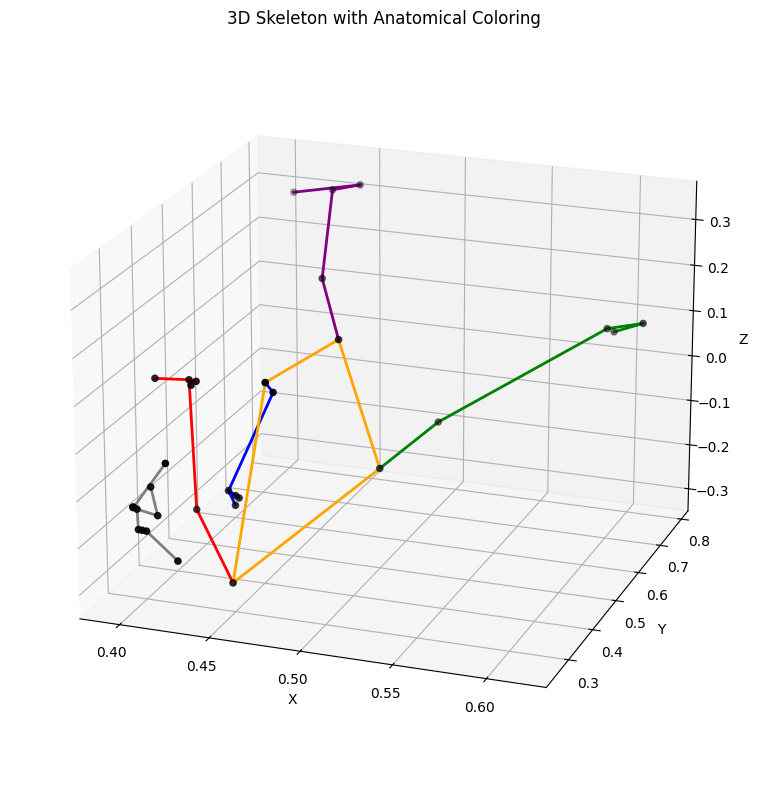

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Replace this with your actual 33-point 3D coordinates
points = np.array(np.array([
    [0.40107161, 0.26773041, -0.1361472],
    [0.40452138, 0.25179106, -0.16857995],
    [0.40680775, 0.25117022, -0.16863954],
    [0.40925911, 0.2505855, -0.16871499],
    [0.401618, 0.25216025, -0.12246912],
    [0.40180206, 0.25174522, -0.12244221],
    [0.40205315, 0.25127938, -0.12239943],
    [0.4262566, 0.25211239, -0.2245716],
    [0.42047885, 0.2511906, -0.01957704],
    [0.41071326, 0.27862489, -0.15137433],
    [0.40698504, 0.2793726, -0.09234468],
    [0.44507498, 0.32130033, -0.30374941],
    [0.46708435, 0.30520844, 0.14294292],
    [0.40911984, 0.41436538, -0.21839598],
    [0.45691833, 0.39352268, 0.07012536],
    [0.41078439, 0.3871963, 0.07851189],
    [0.43100077, 0.39393875, -0.15421526],
    [0.39377794, 0.37400714, 0.08059756],
    [0.43291697, 0.40655905, -0.17111532],
    [0.41486406, 0.36991456, 0.07793377],
    [0.43405467, 0.3985025, -0.187135],
    [0.41752219, 0.37136197, 0.08680099],
    [0.43634716, 0.39747527, -0.16931309],
    [0.49870458, 0.50713253, -0.13605578],
    [0.47672436, 0.50056452, 0.13585661],
    [0.51153362, 0.64614028, -0.10500803],
    [0.44965556, 0.61531532, 0.19803588],
    [0.59582901, 0.72741807, 0.09771351],
    [0.43655205, 0.73925054, 0.32789406],
    [0.6153363, 0.73144096, 0.11585528],
    [0.44999489, 0.75627679, 0.33624622],
    [0.59165657, 0.79271209, 0.0552304],
    [0.40639302, 0.78554469, 0.28921178],
]))

# Anatomical connections
anatomical_connections = {
    'head': [
        (0, 1), (1, 2), (2, 3),
        (0, 4), (4, 5), (5, 6),
        (3, 7), (6, 8),
        (0, 9), (9, 10)
    ],
    'left_arm': [(11, 13), (13, 15), (15, 17), (15, 19), (15, 21)],
    'right_arm': [(12, 14), (14, 16), (16, 18), (16, 20), (16, 22)],
    'torso': [(11, 12), (23, 24), (11, 23), (12, 24)],
    'left_leg': [(23, 25), (25, 27), (27, 29), (29, 31)],
    'right_leg': [(24, 26), (26, 28), (28, 30), (30, 32)],
}

# Color coding
colors = {
    'head': 'gray',
    'left_arm': 'red',
    'right_arm': 'blue',
    'torso': 'orange',
    'left_leg': 'green',
    'right_leg': 'purple',
}

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='black', s=20)

for part, connections in anatomical_connections.items():
    for i, j in connections:
        ax.plot(
            [points[i, 0], points[j, 0]],
            [points[i, 1], points[j, 1]],
            [points[i, 2], points[j, 2]],
            color=colors[part], linewidth=2
        )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Skeleton with Anatomical Coloring')
ax.view_init(elev=20, azim=-70)
plt.tight_layout()
plt.show()


In [20]:
from collections import defaultdict
from sklearn.model_selection import train_test_split

def extract_player_id(filename):
    # Example: 'player1_video1.npy' → 'player1'
    return filename.split('_')[0]

# Organize videos by player
player_video_map = defaultdict(list)
for action, videos in all_keypoints.items():
    for video_file in videos:
        player_id = extract_player_id(video_file)
        player_video_map[player_id].append((action, video_file))

# Split player IDs
players = list(player_video_map.keys())
random.shuffle(players)

train_end = int(len(players) * 0.7)
val_end = int(len(players) * 0.85)

train_players = players[:train_end]
val_players = players[train_end:val_end]
test_players = players[val_end:]

def collect_by_players(player_ids):
    dataset = []
    for pid in player_ids:
        for action, filename in player_video_map[pid]:
            keypoints = all_keypoints[action][filename]
            dataset.append((keypoints, action))
    return dataset

train_set = collect_by_players(train_players)
val_set = collect_by_players(val_players)
test_set = collect_by_players(test_players)

print(f"Train: {len(train_set)}, Val: {len(val_set)}, Test: {len(test_set)}")


Train: 1368, Val: 288, Test: 324


In [21]:
# N = number of samples, # C = 3 (x, y, z), # T = 120 (our fixed number of frames), # V = 33 (MediaPipe joints), # M = number of people
#Prepare data to STGCN (Store keypoints in a numpy array with the shape [N, C, T, V, M])
#Save the labels as integers in a separate pkl file.

import numpy as np
import pickle

ntu_joints_in_mediapipe = [
    0,   # Nose
    11,  # Left Shoulder
    12,  # Right Shoulder
    13,  # Left Elbow
    14,  # Right Elbow
    15,  # Left Wrist
    16,  # Right Wrist
    23,  # Left Hip
    24,  # Right Hip
    25,  # Left Knee
    26,  # Right Knee
    27,  # Left Ankle
    28,  # Right Ankle
    5,   # Right Eye
    2,   # Left Eye
    7,   # Left Ear
    8,   # Right Ear
    17,  # Left Pinky
    18,  # Right Pinky
    19,  # Left Index
    20,  # Right Index
    21,  # Left Thumb
    22,  # Right Thumb
    29,  # Left Foot Index
    30   # Right Foot Index
]

def filter_to_ntu_joints(keypoints): #para usar layout NTU RGB+D
    # keypoints: (T, 33, C)
    return keypoints[:, ntu_joints_in_mediapipe, :]

def prepare_stgcn_data(dataset, label_map):
    data_list = []
    for i, (keypoints, action_name) in enumerate(dataset):
        keypoints = np.array(keypoints)  # (T, 33, C)
        keypoints = filter_to_ntu_joints(keypoints)  # (T, 25, C)
        num_frames, num_joints, channels = keypoints.shape
        # Se só tem 1 pessoa por sample:
        keypoints = keypoints[np.newaxis, ...]  # (M=1, T, V, C)
        # Se tiver keypoint_score, pode adicionar aqui
        sample = {
            'frame_dir': f'sample_{i}',
            'label': label_map[action_name],
            'img_shape': None,           # ou (H, W) se souber
            'total_frames': num_frames,
            'keypoint': keypoints,       # (M, T, V, C)
            # 'keypoint_score': np.ones_like(keypoints[..., 0]),  # opcional
        }
        data_list.append(sample)
    return data_list

# Crie o label_map como já fazia
label_map = {name: idx for idx, name in enumerate(sorted(set(a for _, a in train_set + val_set + test_set)))}

# Prepare os dados no formato correto
train_data = prepare_stgcn_data(train_set, label_map)
val_data = prepare_stgcn_data(val_set, label_map)
test_data = prepare_stgcn_data(test_set, label_map)

# Save the data and labels
# np.save('train_data.npy', train_data)
# with open('train_labels.pkl', 'wb') as f:
#     pickle.dump({'names': train_names, 'labels': train_labels}, f)

# np.save('val_data.npy', val_data)
# with open('val_labels.pkl', 'wb') as f:
#     pickle.dump({'names': val_names, 'labels': val_labels}, f)

# np.save('test_data.npy', test_data)
# with open('test_labels.pkl', 'wb') as f:
#     pickle.dump({'names': test_names, 'labels': test_labels}, f)


with open('/content/dataset/train_labels.pkl', 'wb') as f:
    pickle.dump(train_data, f)

with open('/content/dataset/val_labels.pkl', 'wb') as f:
    pickle.dump(val_data, f)


with open('/content/dataset/test_labels.pkl', 'wb') as f:
    pickle.dump(test_data, f)

print("Data saved successfully!")


Data saved successfully!


#ALL THINGS ABOVE WORK

In [ ]:
#######################################################################################

In [ ]:
# import shutil
# import os

# os.getcwd()

# # Caminho da pasta duplicada
# path_to_remove = '/content/mmaction2'

# # Verifica se a pasta existe e remove
# if os.path.exists(path_to_remove):
#     shutil.rmtree(path_to_remove)
#     print(f"Pasta '{path_to_remove}' removida com sucesso!")
# else:
#     print(f"A pasta '{path_to_remove}' não existe.")


A pasta '/content/mmaction2' não existe.


In [5]:
import os

os.chdir('dataset')

os.getcwd()


'/content/dataset'

In [10]:
# Runtime: 27 min
# Remova instalações antigas ou conflitantes
# !pip uninstall -y mmaction2 mmcv mmcv-full mmengine

# !pip install -U openmim  # Instala o OpenMIM
# !mim install "mmcv>=2.0.0rc4,<2.2.0"  # Instala a versão compatível

# !mim install mmengine

# Exemplo para MMAction2
!git clone https://github.com/open-mmlab/mmaction2.git mmaction2 #alterei
%cd mmaction2
!pip install -e .

fatal: destination path 'mmaction2' already exists and is not an empty directory.
/content/dataset/mmaction2
Obtaining file:///content/dataset/mmaction2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmaction2
    Found existing installation: mmaction2 1.2.0
    Uninstalling mmaction2-1.2.0:
      Successfully uninstalled mmaction2-1.2.0
  Running setup.py develop for mmaction2


In [29]:
### original diana

config_code = """

_base_ = ['/content/dataset/mmaction2/configs/_base_/default_runtime.py']

# Modelo ST-GCN com keypoints 3D
model = dict(
    type='RecognizerGCN',
    backbone=dict(
        type='STGCN',
        graph_cfg=dict(
            layout='nturgb+d',  # usa o layout NTU para dados 3D
            mode='spatial'),
        in_channels=3  # keypoints 3D: x, y, z
    ),
    cls_head=dict(
        type='GCNHead',
        in_channels=256,
        num_classes=12,  # <- alterado para o teu número de classes
        loss_cls=dict(type='CrossEntropyLoss'),
    ),
)

train_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(type='UniformSampleFrames', clip_len=100),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=2),
    dict(type='PackActionInputs')
]
val_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(
        type='UniformSampleFrames', clip_len=100, num_clips=1, test_mode=True),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=2),
    dict(type='PackActionInputs')
]
test_pipeline = [
    dict(type='PreNormalize3D'),
    dict(type='GenSkeFeat', dataset='nturgb+d', feats=['j']),
    dict(
        type='UniformSampleFrames', clip_len=100, num_clips=10,
        test_mode=True),
    dict(type='PoseDecode'),
    dict(type='FormatGCNInput', num_person=2),
    dict(type='PackActionInputs')
]

train_dataloader = dict(
    batch_size=4,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type='PoseDataset',
        ann_file='/content/dataset/train_labels.pkl',  # ALTERADO: caminho absoluto, antes era 'train_labels.pkl'
        pipeline=train_pipeline
    )
)
val_dataloader = dict(
    batch_size=4,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='PoseDataset',
        ann_file='/content/dataset/val_labels.pkl',  # ALTERADO: caminho absoluto, antes era 'val_labels.pkl'
        pipeline=val_pipeline
    )
)
test_dataloader = dict(
    batch_size=4,  # ALTERADO: era 16, agora 4 para teste rápido
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type='PoseDataset',
        ann_file='/content/dataset/test_labels.pkl',  # ALTERADO: caminho absoluto, antes era 'test_labels.pkl'
        pipeline=test_pipeline
    )
)

# val_evaluator = dict(type='AccMetric')
# test_evaluator = val_evaluator

val_evaluator = dict(
    type='AccMetric',
    metric_list=('top_k_accuracy', 'mean_class_accuracy')
)
test_evaluator = val_evaluator

# Wrapper do otimizador
optim_wrapper = dict(
    type='OptimWrapper',
    optimizer=dict(type='Adam', lr=0.0005, weight_decay=0.0001)
)


# Treino
train_cfg = dict(
    type='EpochBasedTrainLoop', max_epochs=10, val_interval=2  # ALTERADO: max_epochs era 80 (ou valor maior), agora 10; val_interval era 5, agora 2
)


# Avaliação
val_cfg = dict(type='ValLoop')
test_cfg = dict(type='TestLoop')


# evaluation = dict(
#     interval=5,
#     metrics=['top_k_accuracy', 'mean_class_accuracy']
# )

# evaluation = dict(
#     interval=2,
#     metrics=['top_k_accuracy', 'mean_class_accuracy'],
#     topk=(1, 3, 5)
# )



evaluation = dict(
    interval=2,
    metrics=['top_k_accuracy', 'mean_class_accuracy'],
    metric_options=dict(top_k_accuracy=dict(topk=(1, 3, 5)))
)




# Salvar checkpoints, logs, etc.
work_dir = '/content/drive/MyDrive/mmaction2_work_dir/stgcn_treino'   # ALTERADO: era './work_dirs/stgcn_3d_custom_test'

load_from = 'https://download.openmmlab.com/mmaction/v1.0/skeleton/stgcn/stgcn_8xb16-joint-u100-80e_ntu60-xsub-keypoint-3d/stgcn_8xb16-joint-u100-80e_ntu60-xsub-keypoint-3d_20221129-850308e1.pth'







"""



# Gravar para o ficheiro na pasta configs/stgcn/
with open('/content/dataset/mmaction2/configs/stgcn_3d_custom.py', 'w') as f:
    f.write(config_code)





In [8]:
from google.colab import drive
drive.mount('/content/drive')


save_path = '/content/drive/MyDrive/mmaction2_work_dir/stgcn_treino'
os.makedirs(save_path, exist_ok=True)




# os.makedirs('/content/drive/MyDrive/mmaction2_work_dir/tensorboard_logs', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# import mmengine

# #verificar instalacao
# print(mmengine.__version__)

# import mmaction
# print(mmaction.__version__)

os.getcwd()

import torch
print(torch.__version__)
print(torch.version.cuda)



2.5.0+cu124
12.4


In [ ]:
!python tools/train.py /content/dataset/mmaction2/configs/stgcn_3d_custom.py


05/21 14:40:47 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1247895955
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cpu
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, COMMIT_SHA=134179474539648ba7dee1317959529fbd0e7f89, CXX_COMPILER=/opt/rh/gcc-toolset-11/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX1

In [ ]:
!ls /content/drive/MyDrive/mmaction2_work_dir

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Update the `work_dir` to save in Google Drive
# work_dir = '/content/drive/MyDrive/mmaction2_work_dir'



In [ ]:
!python tools/train.py /content/dataset/mmaction2/configs/stgcn_3d_custom.py --resume-from /content/drive/MyDrive/mmaction2_work_dir/epoch_1.pth


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/mmaction2_work_dir/20250514_170822/

In [ ]:
import json
import matplotlib.pyplot as plt

# Path to your log file
log_file = '/content/dataset/mmaction2/work_dirs/stgcn_3d_custom_test/last_checkpoint'
# Containers
epochs = []
train_loss = []
val_epochs = []
val_acc = []

# Read file line-by-line and safely parse only JSON lines
with open(log_file, 'r') as f:
    for line in f:
        line = line.strip()
        if not line.startswith('{'):
            continue  # Skip non-JSON lines
        try:
            log = json.loads(line)
            if log.get('mode') == 'train':
                epochs.append(log['epoch'])
                train_loss.append(log['loss'])
            elif log.get('mode') == 'val':
                val_epochs.append(log['epoch'])
                val_acc.append(log.get('top1_acc', 0))
        except json.JSONDecodeError:
            continue  # Skip lines that aren't valid JSON

# Plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(val_epochs, val_acc, label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training Loss & Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
log_file = '/content/dataset/mmaction2/work_dirs/stgcn_3d_custom_test/20250514_101937/20250514_101937.log'

In [ ]:
ls /content/dataset/mmaction2/work_dirs/stgcn_3d_custom_test/20250514_101937/

In [ ]:
#teste
# print(os.getcwd())
# with open('train_labels.pkl', 'rb') as f:
#     data = pickle.load(f)
# print(type(data), type(data[0]))
# print(data[0])

### ok


# Supondo um sample
sample = train_data[0]
print(sample['keypoint'].shape)  # Esperado: (M, T, V, C)
_, _, V, C = sample['keypoint'].shape
print("Joints:", V, "Coords:", C, "Total:", V*C)




#######################################################################################

In [ ]:
!git clone https://github.com/open-mmlab/mmskeleton.git
!cd mmskeleton

In [ ]:
!git clone https://github.com/open-mmlab/mmaction2.git
%cd mmaction2

# Instalar dependências
!pip install -r requirements/build.txt
!pip install -v -e .

# Verifica se tools/train.py existe
!ls tools/train.py

In [ ]:
!conda create -n stgcn python=3.8 -y
!conda activate stgcn
!pip install -r requirements.txt
!python setup.py install

In [ ]:
!mv train_data.npy data/custom_dataset/train_data.npy
!mv train_labels.pkl data/custom_dataset/train_labels.pkl

!mv test_data.npy data/custom_dataset/test_data.npy
!mv test_labels.pkl data/custom_dataset/test_labels.pkl

!mv val_data.npy data/custom_dataset/val_data.npy
!mv val_labels.pkl data/custom_dataset/val_labels.pkl

In [ ]:
class STGCNDataset(Dataset):
    def __init__(self, data, label_map, selected_frames=None):
        self.data = data
        self.label_map = label_map
        self.selected_frames = selected_frames if selected_frames else [20, 40, 60, 80, 100, 120]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        keypoints, label = self.data[idx]

        # Select only the frames you want (convert from 1-based to 0-based index)
        selected_keypoints = []
        for frame_idx in self.selected_frames:
            # Ensure we don't exceed the available frames in the video
            if frame_idx <= keypoints.shape[0]:  # Ensure the frame index is within the video's length
                selected_keypoints.append(keypoints[frame_idx - 1])  # Convert 1-based index to 0-based

        selected_keypoints = np.array(selected_keypoints)

        # Shape: [T, V, C] → [C, T, V, 1]
        selected_keypoints = selected_keypoints.transpose((2, 0, 1))  # [C, T, V]


        label_idx = self.label_map[label]
        return torch.tensor(selected_keypoints, dtype=torch.float32), label_idx


# Create label map
all_labels = sorted({label for _, label in train_set + val_set + test_set})
label_map = {label: i for i, label in enumerate(all_labels)}

# Create datasets
selected_frames = [20, 40, 60, 80, 100, 120]
train_dataset = STGCNDataset(train_set, label_map, selected_frames=selected_frames)
val_dataset = STGCNDataset(val_set, label_map, selected_frames=selected_frames)
test_dataset = STGCNDataset(test_set, label_map, selected_frames=selected_frames)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)


In [ ]:
# Assume you have a simple ST-GCN model class `STGCN` compatible with [C, T, V]
class STGCN(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(STGCN, self).__init__()
        self.gcn = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=(1, 1)),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=(1, 1)),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):  # [B, C, T, V]
        x = self.gcn(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = STGCN(in_channels=3, num_classes=len(label_map)).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

def train_model(model, train_loader, val_loader, epochs=50):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_preds, train_labels = [], []

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_preds.extend(outputs.argmax(1).cpu().numpy())
            train_labels.extend(y.cpu().numpy())

        train_acc = accuracy_score(train_labels, train_preds)

        # Validation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                val_preds.extend(outputs.argmax(1).cpu().numpy())
                val_labels.extend(y.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

train_model(model, train_loader, val_loader, epochs=50)


In [ ]:
torch.save(model.state_dict(), "stgcn_model.pth")

In [ ]:
model.load_state_dict(torch.load("stgcn_model.pth"))
model.to(device)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(model, test_loader, label_map):
    model.eval()
    test_preds, test_labels = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            preds = outputs.argmax(dim=1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(y.cpu().numpy())

    acc = accuracy_score(test_labels, test_preds)
    print(f"\n✅ Final Test Accuracy: {acc:.4f}")

    # Reverse label_map to get class names
    idx_to_class = {v: k for k, v in label_map.items()}

    # Convert indices to class names
    pred_classes = [idx_to_class[p] for p in test_preds]
    true_classes = [idx_to_class[t] for t in test_labels]

    # Print classification report
    print("\n📊 Classification Report:")
    print(classification_report(true_classes, pred_classes, digits=4))

    # Confusion matrix
    cm = confusion_matrix(true_classes, pred_classes, labels=list(label_map.keys()))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys(), cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



In [ ]:
test_model(model, test_loader, label_map)


#Using a pre trained model


In [ ]:
!git clone https://github.com/yysijie/st-gcn.git
!cd st-gcn
!pip install -r requirements.txt

In [ ]:
!pip install torch torchvision torchaudio
!git clone https://github.com/yysijie/st-gcn
%cd st-gcn
!pip install -r requirements.txt
!python setup.py install
%cd ..

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os

class TennisActionDataset(Dataset):
    def __init__(self, data_dir, label_map):
        self.data_dir = data_dir
        self.label_map = label_map
        self.samples = []
        for action_name in os.listdir(data_dir):
            action_path = os.path.join(data_dir, action_name)
            if os.path.isdir(action_path):
                label = self.label_map[action_name]
                for file_name in os.listdir(action_path):
                    if file_name.endswith(".npy"):
                        self.samples.append((os.path.join(action_path, file_name), label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        file_path, label = self.samples[idx]
        keypoints = np.load(file_path)
        keypoints = torch.tensor(keypoints, dtype=torch.float32).permute(1, 0, 2) # (C, T, V) - Channels (x, y, z), Time, Vertices (joints)
        label = torch.tensor(label, dtype=torch.long)
        return keypoints, label

# Create a mapping from your folder names (action classes) to numerical labels
action_classes = sorted([d for d in os.listdir('npy_videos') if os.path.isdir(os.path.join('npy_videos', d))])
label_map = {action: i for i, action in enumerate(action_classes)}

train_dataset = TennisActionDataset(data_dir='npy_videos', label_map=label_map)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create a similar dataset and loader for your validation set
val_dataset = TennisActionDataset(data_dir='val_npy_videos', label_map=label_map)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Assuming you have a model definition in the st-gcn repository
from model import Model as STGCN

num_classes_kinetics = 400 # Kinetics dataset has 400 classes
num_classes_thetis = len(action_classes)

model = STGCN(num_class=num_classes_kinetics, graph_args={'layout': 'openpose', 'strategy': 'spatial'}) # Example graph args

# Load the pretrained weights
pretrained_path = 'path/to/kinetics_pretrained.pth'
checkpoint = torch.load(pretrained_path)
model.load_state_dict(checkpoint['model'], strict=False) # strict=False to allow for different number of output classes

# Modify the final classification layer
model.fc = torch.nn.Linear(model.fc.in_features, num_classes_thetis)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)